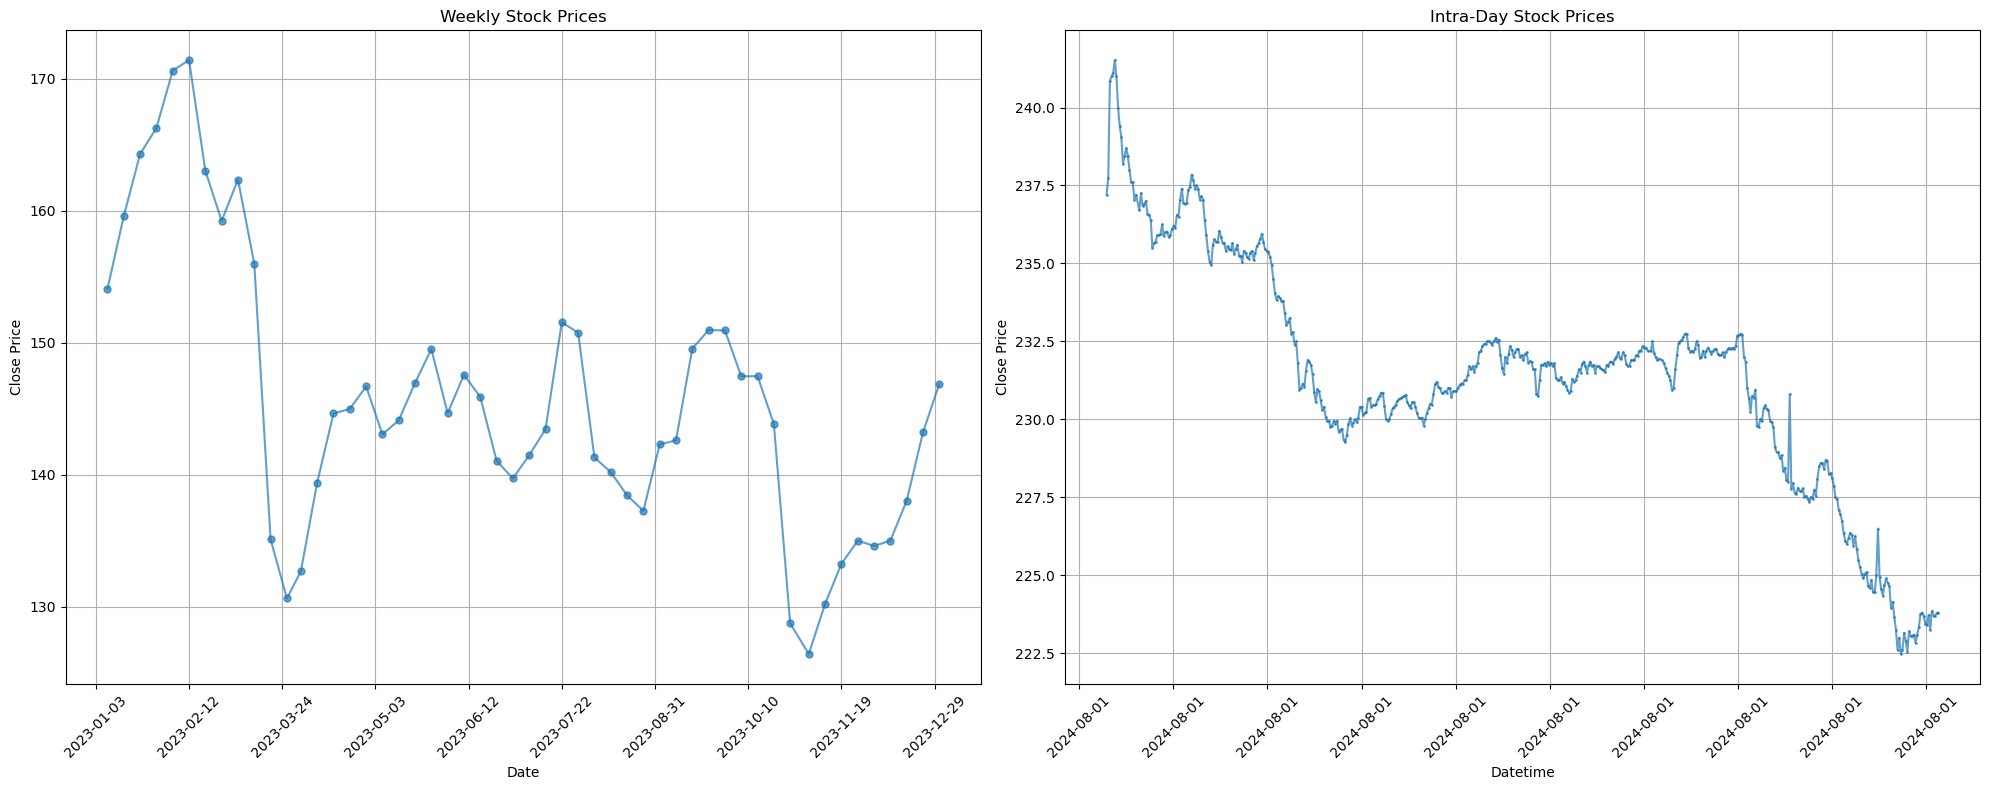

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv("weekly.csv")



# Convert 'Date' column to datetime and extract only the date part
data['Date'] = pd.to_datetime(data['Date'], utc=True)
data['Date'] = data['Date'].dt.date

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns

# Plotting the first plot
axes[0].plot(data['Date'], data['Close'], marker='o', linestyle='-', markersize=5, alpha=0.7)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Close Price')
axes[0].set_title('Weekly Stock Prices')
axes[0].grid(True)

# Set the number of ticks to show on the x-axis for the first plot
axes[0].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[0].tick_params(axis='x', rotation=45)

data2=pd.read_csv("intra.csv")
data2['Datetime']=pd.to_datetime(data2['Datetime'])
data2['Time']= data2['Datetime'].dt.strftime('%H:%M:%S')

# Plotting the second plot (could be identical or modified depending on your needs)
axes[1].plot(data2['Datetime'], data2['Close'], marker='o', linestyle='-', markersize=1, alpha=0.7)
axes[1].set_xlabel('Datetime')
axes[1].set_ylabel('Close Price')
axes[1].set_title('Intra-Day Stock Prices')
axes[1].grid(True)

# Set the number of ticks to show on the x-axis for the second plot
axes[1].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig('Stock comparison.png', dpi=300)  # Save image at 300 DPI



In [13]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download stock price data for a company (e.g., Apple)
company = "AAPL"
company_data = yf.download(company, start="2023-06-01", end="2023-12-31")

# Download stock index data (e.g., S&P 500)
index = "^GSPC"  # S&P 500 index symbol
index_data = yf.download(index, start="2023-06-01", end="2023-12-31")

# Merge the data on the 'Date' column
merged_data = pd.DataFrame({
    'Company Close': company_data['Close'],
    'Index Close': index_data['Close']
})



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


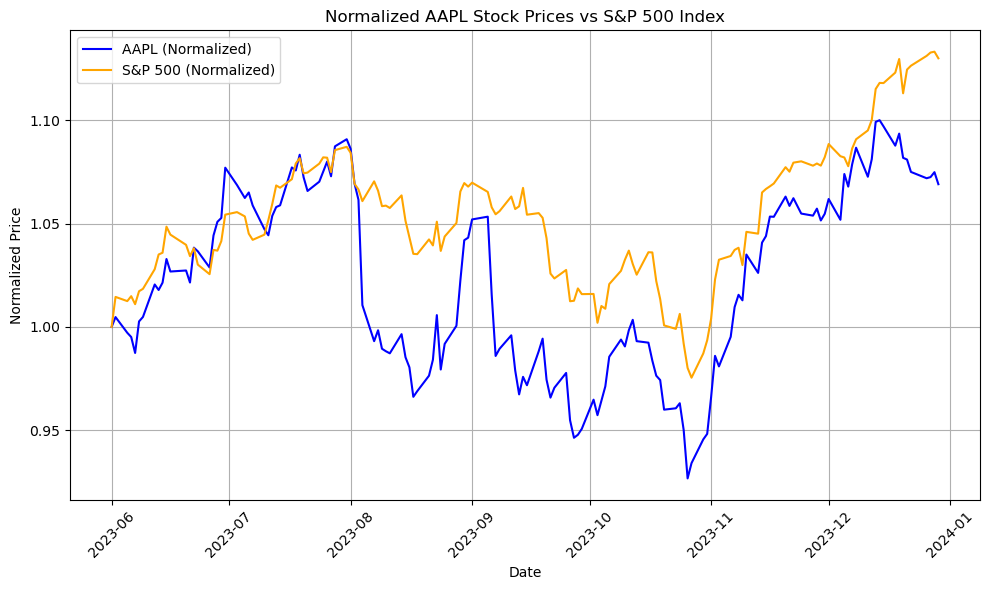

In [14]:
# Normalize the data by dividing each series by its first value
merged_data['Company Close Normalized'] = merged_data['Company Close'] / merged_data['Company Close'].iloc[0]
merged_data['Index Close Normalized'] = merged_data['Index Close'] / merged_data['Index Close'].iloc[0]

# Plot normalized stock prices and stock index
plt.figure(figsize=(10, 6))
plt.plot(merged_data.index, merged_data['Company Close Normalized'], label=f'{company} (Normalized)', color='blue')
plt.plot(merged_data.index, merged_data['Index Close Normalized'], label="S&P 500 (Normalized)", color='orange')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title(f'Normalized {company} Stock Prices vs S&P 500 Index')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


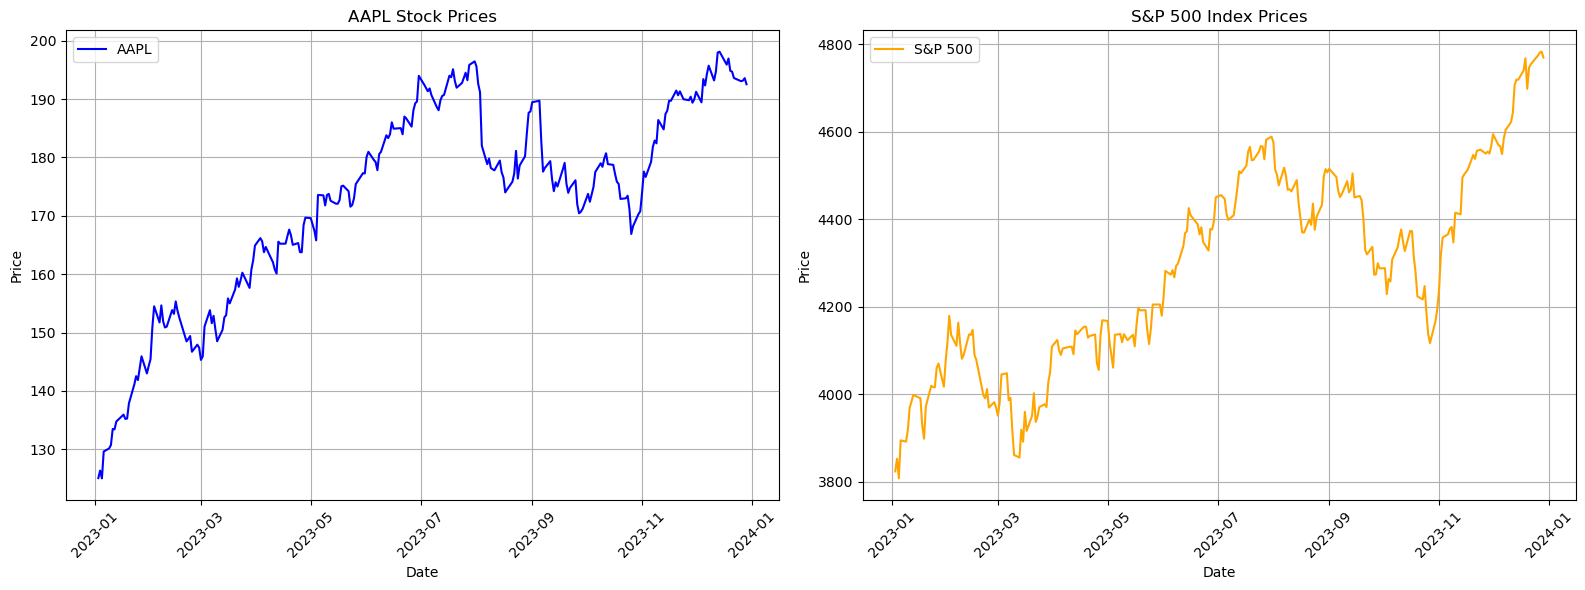

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download stock price data for a company (e.g., Apple)
company = "AAPL"
company_data = yf.download(company, start="2023-01-01", end="2023-12-31")

# Download stock index data (e.g., S&P 500)
index = "^GSPC"  # S&P 500 index symbol
index_data = yf.download(index, start="2023-01-01", end="2023-12-31")

# Merge the data on the 'Date' column
merged_data = pd.DataFrame({
    'Company Close': company_data['Close'],
    'Index Close': index_data['Close']
})

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns, wider figure

# Plot the company stock prices on the first subplot
axes[0].plot(merged_data.index, merged_data['Company Close'], label=company, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].set_title(f'{company} Stock Prices')
axes[0].legend()
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

# Plot the stock index on the second subplot
axes[1].plot(merged_data.index, merged_data['Index Close'], label="S&P 500", color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].set_title('S&P 500 Index Prices')
axes[1].legend()
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()
